<a href="https://colab.research.google.com/github/HasanFil/TASK/blob/main/TASK_6A_6B_6C_6D_6E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB
X : all columns except for the label
Train-test split: .80-.20 (please use the stratify parameter)
Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values. 

TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 


CAPSTONE PROJECT PROPOSAL 

Project Aim: To deliver the main aim of your capstone project. 
Project Description: Please give information about your dataset as well as the scope of the project.
Project Methodology: Please mention the methods (machine learning algorithms) that you are planning to use.
Project Expected Results: Please provide the expected results of your project with respect to the methods and dataset.
Project References: Please provide 4-5 main references.


TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB X : all columns except for the label Train-test split: .80-.20 (please use the stratify parameter) Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_excel('Temporary_data3_Left_Right_Copy.xlsx')
data.head()

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [4]:
y = data["CDRGLOB"]
x = data.drop("CDRGLOB", axis = 1)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)

In [6]:
model.fit(x, y)
y_model = model.predict(x)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

0.6477104874446086

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0,
                                  train_size=0.8)
model.fit(xtrain, ytrain)
ytest_model = model.predict(xtest)
accuracy_score(ytest, ytest_model)


0.5276752767527675

In [9]:
ytest_model = model.fit(xtrain, ytrain).predict(xtest)
ytrain_model = model.fit(xtest, ytest).predict(xtrain)
accuracy_score(ytest, ytest_model), accuracy_score(ytest, ytest_model)

(0.5276752767527675, 0.5276752767527675)

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5)

array([0.46494465, 0.50922509, 0.60147601, 0.52767528, 0.45925926])

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=10)

array([0.50735294, 0.41911765, 0.43382353, 0.52941176, 0.62222222,
       0.58518519, 0.57037037, 0.41481481, 0.38518519, 0.58518519])

TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its parameters) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values.

In [18]:
from sklearn.model_selection import GridSearchCV
model3=KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(0,5),
              'leaf_size': np.arange(12,18),
              'n_jobs': np.arange(5,11)}

grid = GridSearchCV(model, param_grid, cv=5)

In [19]:
grid.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
ValueError: Exp

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'leaf_size': array([12, 13, 14, 15, 16, 17]),
                         'n_jobs': array([ 5,  6,  7,  8,  9, 10]),
                         'n_neighbors': array([0, 1, 2, 3, 4])})

In [20]:
grid.best_params_

{'leaf_size': 12, 'n_jobs': 5, 'n_neighbors': 4}

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid.best_estimator_
y_test3 = model3.fit(xtrain, ytrain).predict(xtest)
score=cross_val_score(model3, xtrain, ytrain, cv=5)
score.mean()

0.5235193719064687

TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

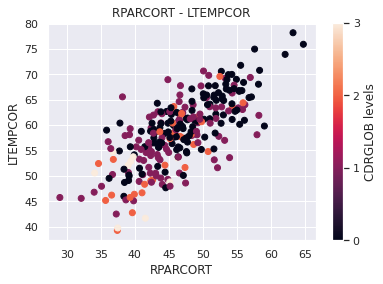

In [30]:
plt.scatter(xtest["RPARCORT"], xtest["LTEMPCOR"],c=ytest)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

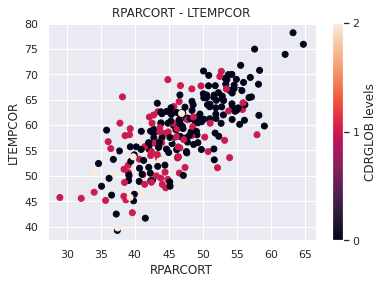

In [34]:
plt.scatter(xtest["RPARCORT"], xtest["LTEMPCOR"],c=y_test3)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions.

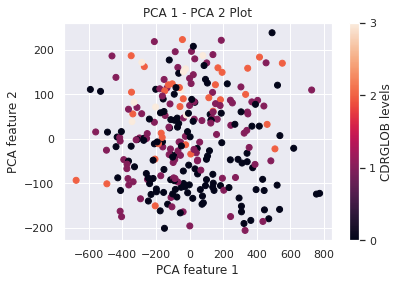

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_x = pca.fit_transform(xtest)
plt.scatter(pca_x[:,0], pca_x[:,1], c=ytest)
plt.title("PCA 1 - PCA 2 Plot")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("PCA feature 2")
plt.xlabel("PCA feature 1")
plt.show()

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education.

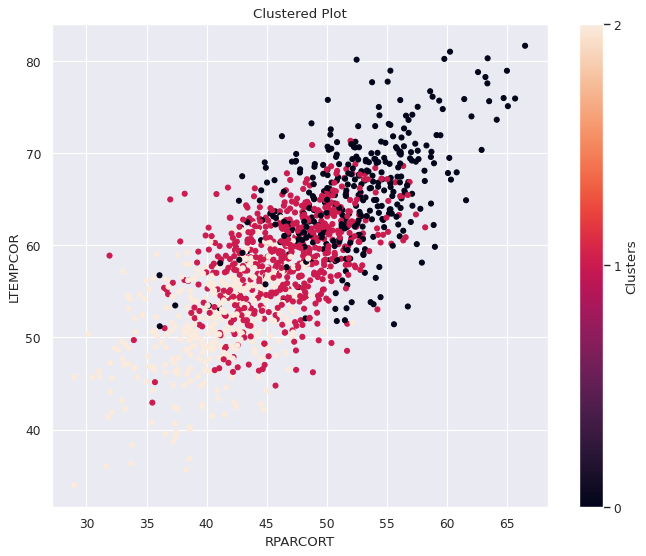

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=0)
my_clusters = kmeans.fit_predict(x)
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(x["RPARCORT"], x["LTEMPCOR"],c=my_clusters, s=20)
plt.title("Clustered Plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();